#### ECN 441A Homework 3
By: George Musabandesu

In [187]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from pytrends.request import TrendReq
import matplotlib.pyplot as plt

# 1.) Clean the Apple Data to get a quarterly series of EPS.

In [188]:
y = pd.read_csv("AAPL_quarterly_financials.csv")
y.head()

,name,ttm,09/30/2023,06/30/2023,03/31/2023,12/31/2022,09/30/2022,06/30/2022,03/31/2022,12/31/2021,...,12/31/1987,09/30/1987,06/30/1987,03/31/1987,12/31/1986,09/30/1986,06/30/1986,03/31/1986,12/31/1985,09/30/1985
0,TotalRevenue,"383,285,000,000","89,498,000,000","81,797,000,000","94,836,000,000","117,154,000,000","90,146,000,000","82,959,000,000","97,278,000,000","123,945,000,000",...,"1,042,400,000","786,500,000","637,100,000","575,300,000","662,300,000","510,800,000","448,300,000","408,900,000","533,900,000","409,700,000"
1,\tOperatingRevenue,"383,285,000,000","89,498,000,000","81,797,000,000","94,836,000,000","117,154,000,000","90,146,000,000","82,959,000,000","97,278,000,000","123,945,000,000",...,"1,042,400,000","786,500,000","637,100,000","575,300,000","662,300,000","510,800,000","448,300,000","408,900,000","533,900,000","409,700,000"
2,CostOfRevenue,"214,137,000,000","49,071,000,000","45,384,000,000","52,860,000,000","66,822,000,000","52,051,000,000","47,074,000,000","54,719,000,000","69,702,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GrossProfit,"169,148,000,000","40,427,000,000","36,413,000,000","41,976,000,000","50,332,000,000","38,095,000,000","35,885,000,000","42,559,000,000","54,243,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OperatingExpense,"54,847,000,000","13,458,000,000","13,415,000,000","13,658,000,000","14,316,000,000","13,201,000,000","12,809,000,000","12,580,000,000","12,755,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
y.index = y.name

In [190]:
y = pd.DataFrame(y.loc["BasicEPS", :]).iloc[2:,:]

In [191]:
y.index = pd.to_datetime(y.index)

In [192]:
# Check if NAS are no dividend period
df.sort_index().fillna(0.)

,Chip wars,Iphone camera,Apple stock,Apple earnings report,US China conflicts,Apple TV,Thanksgiving recipes,Manchester United,Boeing Max planes
date,,,,,,,,,
2004-01-01,21,0,2,0,81,2,0,14,0
2004-02-01,50,0,1,32,0,2,0,13,0
2004-03-01,0,0,2,0,100,2,1,14,50
2004-04-01,18,0,1,77,0,1,0,12,12
2004-05-01,11,0,1,0,0,1,0,11,0
...,...,...,...,...,...,...,...,...,...
2023-09-01,9,98,31,8,7,65,1,55,3
2023-10-01,9,93,22,19,12,59,2,48,2
2023-11-01,9,84,24,44,12,72,18,53,2


# 2.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data. Clean it to have a quarterly average.

In [193]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["Chip wars", "Iphone camera", "Apple stock", "Apple earnings report", "US China conflicts", 
            "Apple TV", "Thanksgiving recipes", "Manchester United", "Boeing Max planes"]  
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    #time.sleep(5)
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [194]:
x = df.resample('Q').mean()
x

,Chip wars,Iphone camera,Apple stock,Apple earnings report,US China conflicts,Apple TV,Thanksgiving recipes,Manchester United,Boeing Max planes
date,,,,,,,,,
2004-03-31,23.666667,0.000000,1.666667,10.666667,60.333333,2.000000,0.333333,13.666667,16.666667
2004-06-30,9.666667,0.000000,1.000000,25.666667,0.000000,1.333333,0.000000,11.666667,4.000000
2004-09-30,14.666667,0.000000,1.333333,0.000000,0.000000,2.000000,1.000000,16.000000,0.000000
2004-12-31,11.666667,0.000000,2.666667,0.000000,0.000000,2.000000,39.666667,14.333333,9.000000
2005-03-31,5.000000,0.000000,5.333333,4.666667,14.333333,2.000000,0.333333,14.666667,3.333333
...,...,...,...,...,...,...,...,...,...
2023-03-31,10.666667,87.000000,32.666667,20.333333,13.000000,61.666667,0.000000,79.000000,3.000000
2023-06-30,10.000000,79.333333,28.000000,29.333333,11.000000,64.333333,0.000000,49.000000,2.666667
2023-09-30,8.000000,87.333333,28.000000,19.666667,6.666667,72.000000,0.333333,50.666667,2.666667


In [195]:
# Align data
temp = pd.concat([y, x], axis = 1).dropna()
y = temp["BasicEPS"].copy()
x = temp.iloc[:,1:].copy()

# 3.) Normalize all the X data

In [196]:
from sklearn.preprocessing import StandardScaler

In [197]:
scaler = StandardScaler()

In [198]:
x_scaled = scaler.fit_transform(x)

# 4.) Run a Lasso with lambda that reduces less than half of your variable. Plot a bar chart.

In [199]:
lasso = Lasso(alpha = 0.01)

In [200]:
lasso.fit(x_scaled, y)

Lasso(alpha=0.01)

In [201]:
coefficients = lasso.coef_

In [202]:
coefficients

array([-0.        ,  0.10909835,  0.17139816,  0.        ,  0.03070968,
        0.00831764,  0.06359469,  0.22720041, -0.        ])

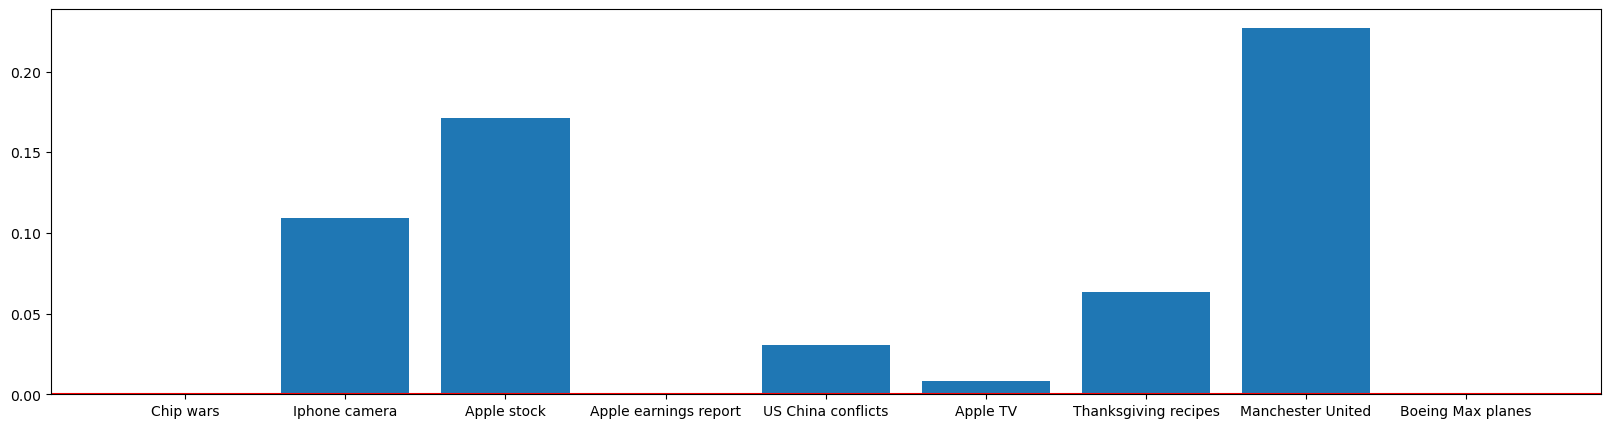

In [203]:
plt.figure(figsize = (20, 5))
plt.bar(range(len(coefficients)), coefficients, tick_label = x.columns)
plt.axhline(0, color = "red")
plt.show()

# 5.) Do these coefficient magnitudes make sense?

Not all of the magnitudes make sense. We have Thanksgiving recipes and Manchester United, which should have no impact on apple shares - showing higher magnitudes than US China conflicts which have the potential to affect Apple operations and profits.